## Inicialización

En nuestro primer paso vamos a agregar todas las librerías que necesitaremos a nuestro análisis. 

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import levene

## Cargar los datos

Ahora vamos a cargar todos los datasets con los que vamos a trabajar. 

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls =  pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

Antes de poder hacer nuestros análisis. Vamos analizar cada una de las tablas para buscar posibles errores y arreglarlos. También agregar información de ser necesario. La idea es dejar nuestros datos listos para poder realizar nuestro análisis. 

## Planes

In [3]:
# Imprimimos la información general sobre el DataFrame de los planes

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprimimos una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



**Observaciones**

Aquí tenemos solo los nombres de los planes y todo lo que cada plan contiene como la cantidad de mensajes, gigabytes, minutos, costo, entre otros. No parece haber información que necesite ser modificada. Los Dtypes de cada columna parecen estar bien y no tenemos valores ausentes o áticos que tratar. No haremos ningún cambio en este dataset. 

## Usuarios

In [5]:
# Imprimimos la información general sobre el DataFrame de los usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprimimos una muestra de los datos para los usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Observaciones**

Aquí observamos la información de cada uno de nuestros 500 clientes. Tenemos su nombre, apellido, edad, ciudad, fecha de registro, tipo de plan, y el churn_date. Podemos ver que los Dtypes de nuestras columnas `reg_date` y `churn_date` son tipo “object” y sería mejor cambiarlos al tipo “datetime”. Esto es una de las cosas que tenemos que corregir en este dataset. También tenemos valores ausentes en nuestra columna `churn_date`. Tenemos que averiguar qué significa esto y si necesitaríamos arreglarlo. También podemos averiguar si tenemos valores atípicos o duplicados. 

### Valores Nulos

In [7]:
#Cuantos valores nulos tenemos?

users['churn_date'].isna().sum()

466

In [8]:
#Cuantas personas con churn_date tenemos?

len(users) - users['churn_date'].isna().sum()

34

In [9]:
#Porcentaje de personas con churn_date

'{:.2%}'.format((len(users) - users['churn_date'].isna().sum()) / users['churn_date'].isna().sum())

'7.30%'

**Conclusiones**

Sabemos que el churn rate es una fecha que indica el dia en que un usario dejo de utilizar el ervicio. Al ver estos cálculos podemos ver que tan solo el 7.30% de los clientes en este datasets han cancelado su subscripcion por alguna razón. Los datos nulos en esta columna nos indican todas las personas que aún continúan usando el servicio y por eso es bueno tener tantos valores nulos en esta columna. Por ahora vamos a dejar esta columna tal como está. 

### Valores Atípicos

Buscaremos valores atípicos en las columnas `age` y `reg_date`.

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64



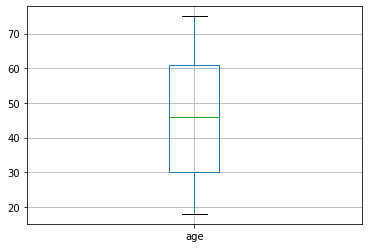

In [10]:
#Valores atípicos en age

print(users['age'].describe())
print()
users.boxplot('age')
plt.show()

In [11]:
#Valores atípicos en reg_date

print(users['reg_date'].min())
print()
print(users['reg_date'].max())


2018-01-01

2018-12-31


**Conclusiones**

Podemos ver que no tenemos valores atípicos en ninguna de estas columnas. Tenemos edades desde los 18 años hasta los 75 que son edades comunes de personas pagando estos planes. También podemos ver que las fechas son todas de este mismo año. Tenemos fechas desde el primero de enero del 2018 hasta el 31 de diciembre del mismo año. 

### Valores duplicados

Aquí tenemos una columna que identifica a cada uno de los usuarios de manera único. Lo que nos facilita el buscar valores duplicados. Solo tenemos que ver si algún user_id esta duplicado. Si no tenemos user_id duplicados entonces no tenemos que hacer ningún cambio. Si llegamos a tener duplicados deberíamos investigar la razón antes de tomar una decisión. 

In [12]:
#valores duplicados

users.duplicated().any()

False

**Conclusiones**

No tenemos valores duplicados entonces no necesitamos hacer ningún cambio. 

### Corregir datos

Aquí vamos a corregir los Dtypes de las columnas `reg_date` y `churn_date`.

In [13]:
#Cambiamos los Dtypes a datetime
users['reg_date'] = users['reg_date'].astype('datetime64')
users['churn_date'] = users['churn_date'].astype('datetime64')

#comprobamos que el cambio se realizó con éxito
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer datos

Vamos a crear una nueva columna que tenga solo el año y mes de registro. 

In [14]:
#Creamos la nueva columna

users['reg_month'] = users['reg_date'].dt.to_period('M')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-05


## Llamadas

In [15]:
#Imprimeimos la información general sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprimimos una muestra de datos para llamadas

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



**Observaciones**

Podemos ver que este dataset nos da información de cada llamada realizada por cada uno de nuestros 500 usuarios. Por esta razón este dataset también tiene una columna con los números de usuario como en la tabla users. Esta tabla nos muestra cada llamada con su id respectivo, la fecha en que se realizó la llamada y su duración. 

Vamos a tener que cambiar el Dtype de la columna `call_date` a datetime como lo hicimos en nuestro anterior dateset. 

Vemos que no tenemos valores ausentes en ninguna de las columnas. Tenemos un total de 137735 llamadas. Podríamos ver si tenemos valores atípicos en la columna `call_date` y ` duration` y también podríamos ver si tenemos valores duplicados o no. 

### Valores Atípicos

In [17]:
#Valores atípicos en call_date

print(calls['call_date'].min())
print()
print(calls['call_date'].max())

2018-01-15

2018-12-31


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

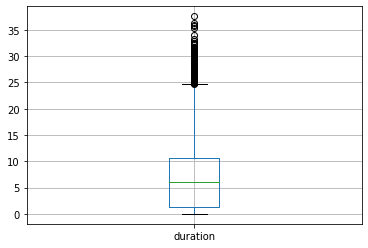

In [18]:
#Valores atípicos en duration

calls.boxplot('duration')
calls['duration'].describe()

In [19]:
#cuantas llamadas de mas de 25 minutos tenemos?

len(calls[calls['duration'] > 25])

466

In [20]:
#cuantas llamadas de 0 minutos tenemos?

len(calls[calls['duration'] == 0])

26834

**Conclusiones**

Podemos ver que en la columna ` call_date` no tenemos valores atípicos. Tenemos fechas igualmente de todo el año 2018; de enero a diciembre. Sin embargo, en nuestra columna ` duration` si tenemos valores atípicos. Podemos ver que tenemos llamadas des de los 0 hasta los 37 minutos. Podemos ver en nuestro diagrama de caja de las llamadas pasadas los 25 minutos podrían considerarse como atípicas, pero a mi parecer está bien que hayan llamadas tan largas. De hecho, pienso que podría haber hasta llamadas aún más largas.  No creo necesario tener que eliminar estos datos o hacer algún tipo de limpieza ya que estas duraciones nos ayudaran a hacer nuestro análisis más adelante. De igual manera aquellas llamadas que han durado 0 minutos puedes ser llamadas perdidas, pero nuevamente esto no afectara nuestro análisis; por lo tanto, no las eliminaremos. 

### Corregir datos


Cambiaremos el Dtype de la columna `call_date` a datetime.

In [21]:
#Hacemos el cambio

calls['call_date'] = pd.to_datetime(calls['call_date'])

#Comprobamos el cambio

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer datos


Para enriquecer los datos en este dataset haremos lo siguiente:

-	Crear una columna con el ano y mes de cada llamada.
-	Crear una columna de minutos por llamada redondeando hacia arriba. 
-	Crear una columna con la cantidad de llamadas hechas al mes por cada usuario.
-	Crear una columna con la suma de minutos por mes de cada usuario.


In [22]:
#Creamos la columna con el mes y año 
calls['month_year'] = calls['call_date'].dt.to_period('M')

#Redondemos hacia arriba la columna duration
calls['duration_up'] = np.ceil(calls['duration'])

calls

,id,user_id,call_date,duration,month_year,duration_up
0,1000_93,1000,2018-12-27,8.52,2018-12,9.0
1,1000_145,1000,2018-12-27,13.66,2018-12,14.0
2,1000_247,1000,2018-12-27,14.48,2018-12,15.0
3,1000_309,1000,2018-12-28,5.76,2018-12,6.0
4,1000_380,1000,2018-12-30,4.22,2018-12,5.0
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11,9.0
137731,1499_200,1499,2018-10-20,10.89,2018-10,11.0
137732,1499_201,1499,2018-09-21,8.12,2018-09,9.0
137733,1499_202,1499,2018-10-10,0.37,2018-10,1.0


In [23]:
#Creamos una tabla con las columnas que necesitamos de llamadas y minutos. 

calls_sum_count = (
    calls.
    groupby(['user_id', 'month_year'])['duration_up'].
    agg(calls_month=('count'), mins_month=('sum')).
    reset_index()
)
calls_sum_count

,user_id,month_year,calls_month,mins_month
0,1000,2018-12,16,124.0
1,1001,2018-08,27,182.0
2,1001,2018-09,49,315.0
3,1001,2018-10,65,393.0
4,1001,2018-11,64,426.0
...,...,...,...,...
2253,1498,2018-12,39,339.0
2254,1499,2018-09,41,346.0
2255,1499,2018-10,53,385.0
2256,1499,2018-11,45,308.0


In [24]:
#Ahora hacemos un inner merge de nuestro dataset y el nuevo que creamos

calls_1 = calls.merge(calls_sum_count,how='inner',on=['user_id','month_year'])
calls_1

,id,user_id,call_date,duration,month_year,duration_up,calls_month,mins_month
0,1000_93,1000,2018-12-27,8.52,2018-12,9.0,16,124.0
1,1000_145,1000,2018-12-27,13.66,2018-12,14.0,16,124.0
2,1000_247,1000,2018-12-27,14.48,2018-12,15.0,16,124.0
3,1000_309,1000,2018-12-28,5.76,2018-12,6.0,16,124.0
4,1000_380,1000,2018-12-30,4.22,2018-12,5.0,16,124.0
...,...,...,...,...,...,...,...,...
137730,1499_184,1499,2018-09-15,0.00,2018-09,0.0,41,346.0
137731,1499_188,1499,2018-09-29,23.42,2018-09,24.0,41,346.0
137732,1499_190,1499,2018-09-03,7.82,2018-09,8.0,41,346.0
137733,1499_195,1499,2018-09-16,1.39,2018-09,2.0,41,346.0


## Mensajes

In [25]:
# Imprimimos la información general sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprimimos una muestra de datos para los mensajes

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Al igual que en nuestros datasets anteriores, tenemos aquí una columna para identificar cada mensaje enviado por cada usuario. Podemos ver que tenemos la columna de `user_id` tal como en el nuestro dataset de llamadas. No tenemos valores ausentes. Tenemos que cambiar el Dtype de la columna `message_date` y también podemos ver si tenemos valores atípicos en esta columna. 

### Valores Atípicos

Vamos a ver si tenemos valores atípicos en la columna `message_date`

In [27]:
#Analizamos los valores máximos y mínimos de esta columna. 

print(messages['message_date'].min())
print()
print(messages['message_date'].max())

2018-01-15

2018-12-31


**Conclusion**

No tenemos valores atípicos en esta columna. 

### Corregir datos


Vamos a cambiar el Dtype de la columna `message_date` a datetime. 

In [28]:
#Hacemos el cambio a datetime

messages['message_date'] = pd.to_datetime(messages['message_date'])

#Comprobamos que se hizo el cambio

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos


Para enriquecer los datos en este dataset haremos lo siguiente:

-	Crear una columna con el mes y año de cada mensaje 
-	Crear una columna con la suma de todos los mensajes enviados al mes por cada persona. 


In [29]:
#Creamos una columna con el mes y año  

messages['month_year'] = messages['message_date'].dt.to_period('M')
messages.head()

,id,user_id,message_date,month_year
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [30]:
#Creamos un dataframe con la información que necesitamos 

messages_count = (
    messages.
    groupby(['user_id','month_year'])['message_date'].
    count().
    reset_index().
    rename(columns = {'message_date':'messages_month'})
    )
messages_count.head()

,user_id,month_year,messages_month
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [31]:
#Hacemos un inner merge con nuestro dataset messages. 

messages_1 = messages.merge(messages_count,how='inner',on=['user_id','month_year'])
messages_1.head()

,id,user_id,message_date,month_year,messages_month
0,1000_125,1000,2018-12-27,2018-12,11
1,1000_160,1000,2018-12-31,2018-12,11
2,1000_223,1000,2018-12-31,2018-12,11
3,1000_251,1000,2018-12-27,2018-12,11
4,1000_255,1000,2018-12-26,2018-12,11


## Internet

In [32]:
# Imprimimos la información general sobre el DataFrame de los mensajes

internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Imprimimos una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Aquí vemos que sucede lo mismo que en nuestros datasets anteriores. Tenemos una columna que identifica a cada sesión por cada usuario. Teneos la fecha de cada sesión y la cantidad de megabytes usados en esa sesión. No tenemos valores nulos en ninguna columna y tenemos nuestra columna de fecha que necesita ser cambiado su Dtype a datetime. Aquí podemos analizar valores atípicos en nuestra columna de fecha y de megabytes usados. 

### Valores Atípicos

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

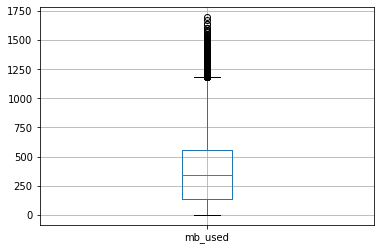

In [34]:
#Valores atípicos en mb_used

internet.boxplot('mb_used')
internet['mb_used'].describe()

In [35]:
#Cuantos valores mayores a 1200 tenemos?

len(internet[internet['mb_used'] > 1200])

364

In [36]:
#Cual es el porcentaje de valores superiores a 1200?

'{:.2%}'.format(len(internet[internet['mb_used'] > 1200])/len(internet))

'0.35%'

In [37]:
#Cuantos valores 0 tenemos?

len(internet[internet['mb_used'] == 0])

13747

In [38]:
#Cual es el porcentaje de 0 tenemos?

'{:.2%}'.format(len(internet[internet['mb_used'] == 0])/len(internet))

'13.11%'

In [39]:
#Valores atípicos en session_date

print(internet['session_date'].min())
print()
print(internet['session_date'].max())

2018-01-15

2018-12-31


**Conclusiones**

En nuestra columna ` mb_used` podemos ver que tenemos valores atípicos al observar nuestro diagrama de caja. Vemos que podrían considerarse como valores atípicos los valores mayores a 1200 megabytes. También vemos que tenemos sesiones en las que no se consumieron megabytes. Hemos analizado las proporciones de estos valores atípicos de acuerdo a todo nuestro dataset. Vemos que la proporción de valores altos es muy baja con un 0.35% y que los valores de 0 son un poco más significativos con un 13.11%. 

A pesar de tener estos valores atípicos en este dataset, no vamos a eliminarlos. A nosotros nos interesa la suma total de megabytes consumidos por usuario por lo que todo valor ya sea alto o bajo nos servirá. Sin embargo, en otro momento podríamos indagar más en porque tenemos estos valores y más aún los valores de 0. 

En nuestra columna ` session_date` no tenemos valores atípicos. 


### Corregir datos


Vamos a cambiar el Dtype de nuestra columna `session_date` a datetime. 

In [40]:
#Hacemos el cambio

internet['session_date'] = pd.to_datetime(internet['session_date'])
#Comprobamos el cambio

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos


Para enriquecer los datos en este dataset haremos lo siguiente:

-	Crearemos una columna de mes y año como en los otros datasets
-	Creamos una columna con la suma de megabytes usados al mes por cliente
-	Creamos una columna de los gigabytes usados al mes por cliente


In [41]:
#Creamos una columna de mes y año 

internet['month_year'] = internet['session_date'].dt.to_period('M')

internet.head()

,id,user_id,session_date,mb_used,month_year
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [42]:
#Creamos una dataset con la información para la nueva columna

internet_mb_count = (
    internet.groupby(['user_id','month_year'])['mb_used'].
    sum().
    reset_index().
    rename(columns={'mb_used':'mb_month'})
)
internet_mb_count

,user_id,month_year,mb_month
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [43]:
#Ahora haceos el merge para agregar la columna a nuestro dataset

internet_1 = internet.merge(internet_mb_count,how='inner',on=['user_id','month_year'])
internet_1.head()

,id,user_id,session_date,mb_used,month_year,mb_month
0,1000_13,1000,2018-12-29,89.86,2018-12,1901.47
1,1000_204,1000,2018-12-31,0.00,2018-12,1901.47
2,1000_379,1000,2018-12-28,660.40,2018-12,1901.47
3,1000_413,1000,2018-12-26,270.99,2018-12,1901.47
4,1000_442,1000,2018-12-27,880.22,2018-12,1901.47


In [44]:
#Ahora creamos nuestra columna en gigabytes 

internet_1['gb_month_up'] = np.ceil(internet_1['mb_month']/1024)
internet_1.head()

,id,user_id,session_date,mb_used,month_year,mb_month,gb_month_up
0,1000_13,1000,2018-12-29,89.86,2018-12,1901.47,2.0
1,1000_204,1000,2018-12-31,0.00,2018-12,1901.47,2.0
2,1000_379,1000,2018-12-28,660.40,2018-12,1901.47,2.0
3,1000_413,1000,2018-12-26,270.99,2018-12,1901.47,2.0
4,1000_442,1000,2018-12-27,880.22,2018-12,1901.47,2.0


## Estudiar las condiciones del plan


Vamos imprimir nuevamente la tabla de plans para poder analizar la información que nos da. 

In [45]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Conclusiones**

Aquí podemos ver que tenemos toda la información para cada plan. En este caso el plan surf y ultimate. Cada uno contiene una descripción de cuantos mensajes, megabytes, y minutos incluye. También tenemos el precio de cada paquete y el costo por mensajes, minutos, y megabytes adicionales. 


## Agregar datos por usuario


Para que nuestro análisis sea más sencillo vamos a crear tablas de cantidad de llamadas, mensajes, cantidad de minutos, y megabytes usados al mes por cada usuario. Luego uniremos todas estas tablas para poder realizar nuestro análisis. 

In [46]:
# Calculamos el número de llamadas hechas por cada usuario por mes

calls_user_month = calls_1.groupby(['user_id','month_year'])['calls_month'].count().reset_index()
calls_user_month

,user_id,month_year,calls_month
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [47]:
# Calculamos la cantidad de minutos que usó cada usuario por mes

mins_user_month = calls.groupby(['user_id','month_year'])['duration_up'].sum().reset_index()
mins_user_month

,user_id,month_year,duration_up
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [48]:
# Calculamos el número de mensajes enviados por cada usuario por mes

messages_user_month = messages_1.groupby(['user_id','month_year'])['messages_month'].count().reset_index()
messages_user_month

,user_id,month_year,messages_month
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [49]:
# Calculamos el volumen del trafico de internet usado por cada usuario por mes.

gigabytes_user_month = internet.groupby(['user_id','month_year'])['mb_used'].agg(mb_month = ('sum')).reset_index()
gigabytes_user_month

,user_id,month_year,mb_month
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


Ahora vamos a combinar los datos en un solo dataframe. 

In [50]:
# Combinamos los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

complete_df = calls_user_month.merge(gigabytes_user_month,how='outer',on=['user_id','month_year'])
complete_df = complete_df.merge(mins_user_month,how='outer',on=['user_id','month_year'])
complete_df = complete_df.merge(messages_user_month,how='outer',on=['user_id','month_year'])
complete_df = complete_df.merge(users[['user_id', 'plan','city']],on='user_id',how='inner')
complete_df

,user_id,month_year,calls_month,mb_month,duration_up,messages_month,plan,city
0,1000,2018-12,16.0,1901.47,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,6919.15,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,13314.82,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,22330.49,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,18504.30,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2288,1204,2018-11,NaN,21346.95,NaN,42.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
2289,1204,2018-12,NaN,36730.05,NaN,78.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
2290,1349,2018-10,NaN,13093.55,NaN,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2291,1349,2018-11,NaN,17128.26,NaN,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"


A imprimir la tabla resultante, podemos ver que tenemos valores ausentes. Vamos a ver que columnas tienen valores ausentes y analizar el porqué. 

In [51]:
#Imprimimos un info de la tabla nueva

complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month_year      2293 non-null   period[M]
 2   calls_month     2258 non-null   float64  
 3   mb_month        2277 non-null   float64  
 4   duration_up     2258 non-null   float64  
 5   messages_month  1806 non-null   float64  
 6   plan            2293 non-null   object   
 7   city            2293 non-null   object   
dtypes: float64(4), int64(1), object(2), period[M](1)
memory usage: 161.2+ KB


Aquí podemos ver que las columnas `calls-month`, `gb_month`, `duration_up`, y `messages_month` son las que tiene valores ausentes. Esto es normal ya que entre todas nuestras fechas habrán usuarios que no consuman llamadas, mensajes, o internet. 

Por lo tanto, para resolver este problema vamos a rellenar estos datos con ceros. 


In [52]:
#Rellenamos los valores nulos de las columnas antes mencionadas con ceros. 

complete_df[['calls_month','duration_up','messages_month','mb_month']] = complete_df[[
    'calls_month','duration_up','messages_month','mb_month']].fillna(0)
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month_year      2293 non-null   period[M]
 2   calls_month     2293 non-null   float64  
 3   mb_month        2293 non-null   float64  
 4   duration_up     2293 non-null   float64  
 5   messages_month  2293 non-null   float64  
 6   plan            2293 non-null   object   
 7   city            2293 non-null   object   
dtypes: float64(4), int64(1), object(2), period[M](1)
memory usage: 161.2+ KB


Perfecto ahora ya noPerfecto ahora ya no tenemos valores ausentes.  tenemos valores ausentes. 

Antes de poder unir este dataset con el de plans, necesitamos cambiar el nombre de la columna `plan_name` to `plans`. 

In [53]:
#Cambiamos el nombre de la columna

plans.rename(columns = {'plan_name':'plan'},inplace=True)
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [54]:
# Añadimos la información del plan

complete_df = complete_df.merge(plans,how='left',on='plan')
complete_df

,user_id,month_year,calls_month,mb_month,duration_up,messages_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,16.0,1901.47,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08,27.0,6919.15,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,2018-09,49.0,13314.82,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,2018-10,65.0,22330.49,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,2018-11,64.0,18504.30,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-11,0.0,21346.95,0.0,42.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30720,3000,70,7,0.01,0.01
2289,1204,2018-12,0.0,36730.05,0.0,78.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30720,3000,70,7,0.01,0.01
2290,1349,2018-10,0.0,13093.55,0.0,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03
2291,1349,2018-11,0.0,17128.26,0.0,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03



Ahora que ya tenemos toda esta información limpia en nuestro dataset, vamos a crear una nueva columna calculando el ingreso mensual por cada usuario. Para esto necesitamos hacer lo siguiente:

-	Calcular el ingreso normal por plan
-	Calcular cantidad de mensajes adicionales a cobrar en caso de existir
-	Calcular cantidad de minutos adicionales a cobrar en caso de existir
-	Calcular cantidad de gigabytes adicionales a cobrar en caso de existir
-	Calcular el ingreso adicional por mensajes en caso de existir
-	Calcular el ingreso adicional de gigabytes usados en caso de existir
-	Calcular el ingreso adicional de minutos en caso de existir

Para esto crearemos una función que nos ayude a hacer los cálculos y nos regrese el ingreso mensual por cada usuario. 


In [55]:
#Creamos una función que nos ayude a calcular el ingreso mensual por usuario.

def monthly_income (row):
    mb_month = row['mb_month']
    duration_up = row['duration_up']
    messages_month = row['messages_month']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    minutes_included = row['minutes_included']
    usd_monthly_pay = row['usd_monthly_pay']
    usd_per_gb  = row['usd_per_gb']
    usd_per_message = row['usd_per_message']
    usd_per_minute = row['usd_per_minute']

    if duration_up > minutes_included:
        extra_minutes = duration_up - minutes_included
    else:
        extra_minutes = 0

    if mb_month > mb_per_month_included:
        extra_mb = np.ceil((mb_month - mb_per_month_included)/1024)
    else:
        extra_mb = 0

    if messages_month > messages_included:
        extra_messages = messages_month - messages_included
    else:
        extra_messages = 0

    monthly_income = (
        usd_monthly_pay + 
         (extra_minutes * usd_per_minute) + 
          (extra_mb * usd_per_gb) + 
           (extra_messages * usd_per_message)
    )
    
    return monthly_income

In [56]:
#Comprobamos que funciona

print(monthly_income(complete_df.iloc[0]))
print(monthly_income(complete_df.iloc[1]))
print(monthly_income(complete_df.iloc[3]))
print(monthly_income(complete_df.iloc[4]))

70.0
20.0
90.09
60.0


In [57]:
# La aplicamos a nuestro dataset para crear la nueva columna

complete_df['monthly_income'] = complete_df.apply(monthly_income,axis=1)
complete_df.head()

,user_id,month_year,calls_month,mb_month,duration_up,messages_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income
0,1000,2018-12,16.0,1901.47,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,2018-08,27.0,6919.15,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
2,1001,2018-09,49.0,13314.82,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
3,1001,2018-10,65.0,22330.49,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,90.09
4,1001,2018-11,64.0,18504.30,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00


In [58]:
#Anadimos una columna de mes

complete_df['month'] = complete_df['month_year'].dt.month
complete_df.head()

,user_id,month_year,calls_month,mb_month,duration_up,messages_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income,month
0,1000,2018-12,16.0,1901.47,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.00,12
1,1001,2018-08,27.0,6919.15,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00,8
2,1001,2018-09,49.0,13314.82,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00,9
3,1001,2018-10,65.0,22330.49,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,90.09,10
4,1001,2018-11,64.0,18504.30,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00,11


In [59]:
pd.set_option('display.max_columns', None)
complete_df.query("user_id == 1001").sort_values(by='month_year')

,user_id,month_year,calls_month,mb_month,duration_up,messages_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income,month
1,1001,2018-08,27.0,6919.15,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00,8
2,1001,2018-09,49.0,13314.82,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00,9
3,1001,2018-10,65.0,22330.49,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,90.09,10
4,1001,2018-11,64.0,18504.30,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00,11
5,1001,2018-12,56.0,19369.18,412.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00,12


| user_id | plan_name | city                          | month | n_calls | duration_round | n_sms | mb_used   | gb_round | messages_included | mb_per_month_included | minutes_included | usd_monthly_pay | usd_per_gb | usd_per_message | usd_per_minute | gb_per_month_included | cargo_calls | cargo_sms | cargo_internet | total_ingreso |
|---------|-----------|-------------------------------|-------|---------|----------------|-------|-----------|----------|-------------------|-----------------------|------------------|-----------------|------------|-----------------|----------------|-----------------------|-------------|-----------|----------------|---------------|
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 8     | 27      | 182            | 30    | 6919.15   | 7        | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 0              | 20            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 9     | 49      | 315            | 44    | 13314.82  | 14       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 0              | 20            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 10    | 65      | 393            | 53    | 22330.49  | 22       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0.09      | 70             | 90.09         |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 11    | 64      | 426            | 36    | 18504.3   | 19       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 40             | 60            |
| 1001    | surf      | Seattle-Tacoma-Bellevue, WA MSA | 12    | 56      | 412            | 44    | 19369.18  | 19       | 50                | 15360                 | 500              | 20              | 10         | 0.03            | 0.03           | 15                    | 0           | 0         | 40             | 60            |

## Estudia el comportamiento del usuario

En esta sección vamos a estudiar el comportamiento de los usuarios de cada plan. Vamos a analizar como los usuarios de cada plan usan las llamadas, mensajes, y megabytes que se les dan en cada plan. Nuestro objetivo es saber si los usuarios de cada plan usan sus minutos, mensajes, y megabytes de manera diferente. 

### Llamadas

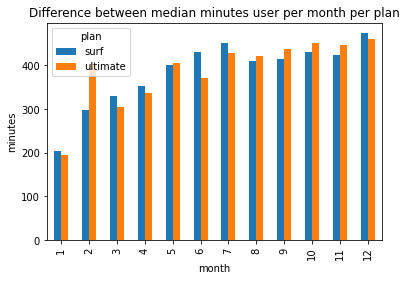

In [82]:
# Comparamos la duración promedio de llamadas por cada plan por cada mes

complete_df.pivot_table(values="duration_up", index="month", columns="plan", aggfunc="mean").plot(kind="bar")

plt.title('Difference between median minutes user per month per plan')
plt.ylabel('minutes')
plt.show()

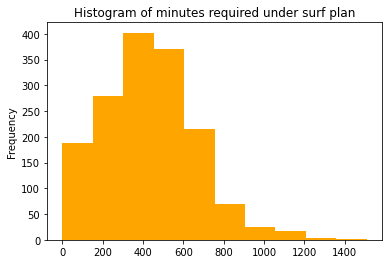

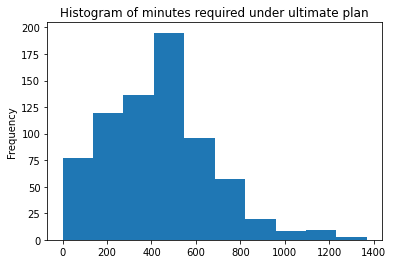

In [75]:
# Comparamos el número de minutos que los usuarios de cada plan requieren cada mes

for name, df in complete_df.groupby(['plan'])['duration_up']:
    if name == "surf":
        plt.hist(df,color='orange')
    else:
        plt.hist(df)
    plt.title(f'Histogram of minutes required under {name} plan')
    plt.ylabel('Frequency')
    plt.show()

In [76]:
# Calculamos la media y la varianza de la duración mensual de llamadas.

complete_df.groupby(['plan'])['duration_up'].agg(['median',np.var])

,median,var
plan,,
surf,425.0,54968.279461
ultimate,424.0,57844.464812


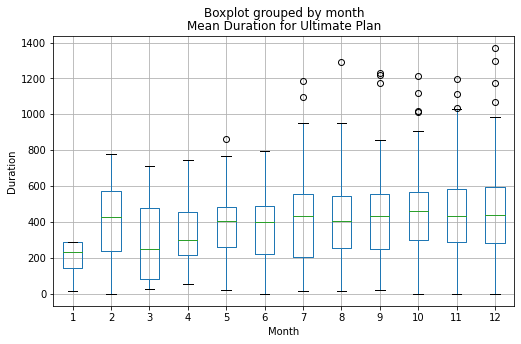

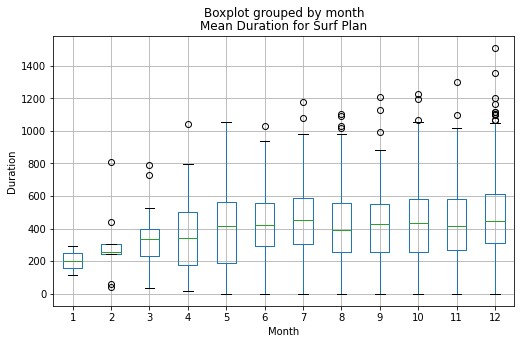

In [86]:
# Trazamos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.

for plan in complete_df['plan'].unique():
    
    data = complete_df[complete_df['plan'] == plan]
    
    if plan == 'surf':
        data.boxplot(column='duration_up',by='month',figsize=(8,5))
    
    else:
        data.boxplot(column='duration_up',by='month',figsize=(8,5))

    plt.title(f"Mean Duration for {plan.capitalize()} Plan")
    plt.xlabel('Month')
    plt.ylabel('Duration')
    plt.show()

**Conclusiones**

Al analizar cada uno de nuestros gráficos podemos ver que los usuarios de ambos planes tienen comportamientos similares en cuanto a la cantidad de minutos utilizados cada mes. 

En nuestro grafico de barras podemos ver que las medias por mes de ambos planes son bastante similares. Sin embargo, podemos ver que en algunos meses las medias de uno de los planes son mayores. Como por ejemplo en el mes de febrero el plan ‘ultimate’ tuvo las medias más altas. Y en los meses de junio y julio ‘surf’ tuvo las medias más altas. 

Nuestros histogramas también se parecen bastante. Ambos tienen una distribución similar con la mayoría de datos entre 0 y 800 minutos. Sin embargo, podemos ver que en el plan surf tenemos valores más arriba de 1400 minutos y en el plan ultimate no. 

Nuestras medianas también son bastante similares. El plan ‘surf’ con una mediana de 425 y el plan ‘ultimate’ con una mediana de 424. 

Los diagramas de caja también presentan una distribución similar para cada plan. Aquí también podemos observar que el plan ‘surf’ tiene más usuarios utilizando minutos más arriba de 1000 que en el plan ‘ultimate’.

En concusión parecen tener comportamientos bastante similares los usuarios de ambos planes en lo que corresponde a los minutos usados al mes. 


### Mensajes

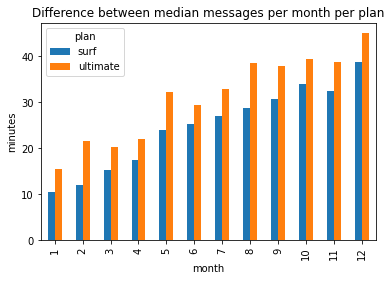

In [100]:
# Comparamos la cantidad promedio de mesajes por cada plan por cada mes

complete_df.pivot_table(values="messages_month", index="month", columns="plan", aggfunc="mean").plot(kind="bar")

plt.title('Difference between median messages per month per plan')
plt.ylabel('minutes')
plt.show()

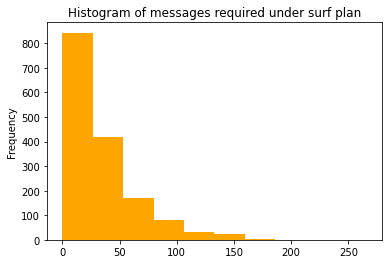

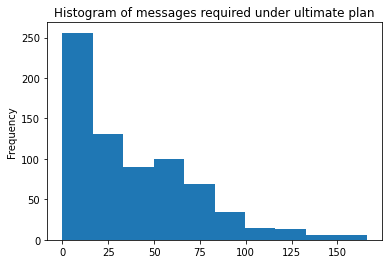

In [67]:
# Comparamos la cantidad de mensajes que los usuarios de cada plan requieren cada mes

for name, df in complete_df.groupby('plan')['messages_month']:
    if name == "surf":
      plt.hist(df,color='orange')
    else:
      plt.hist(df)
    plt.title(f'Histogram of messages required under {name} plan')
    plt.ylabel('Frequency')
    plt.show()

In [68]:
#Calculamos la media y la varianza de la cantidade mensual de mensajes

complete_df.groupby('plan')['messages_month'].agg(['median',np.var])

,median,var
plan,,
surf,24.0,1126.724522
ultimate,30.0,1208.756744


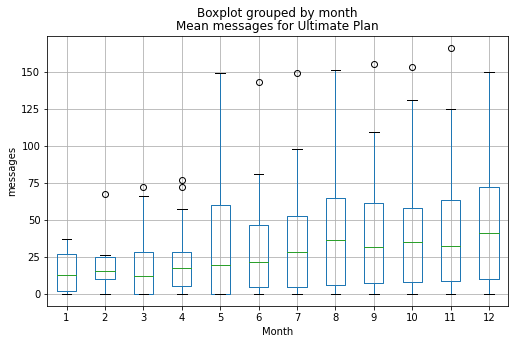

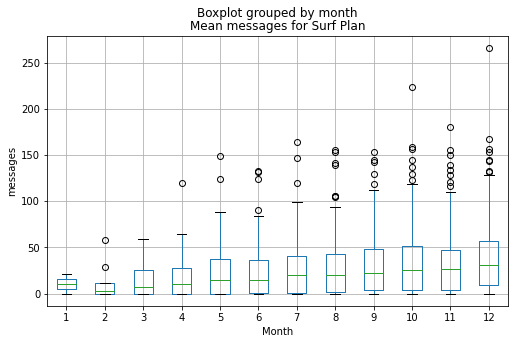

In [93]:
#Trazamos un diagrama de caja para visualizar la distribución de la duración mensual de mensajes.

for plan in complete_df['plan'].unique():
    
    data = complete_df[complete_df['plan'] == plan]
    
    if plan == 'surf':
        data.boxplot(column='messages_month',by='month',figsize=(8,5))
    
    else:
        data.boxplot(column='messages_month',by='month',figsize=(8,5))

    plt.title(f"Mean messages for {plan.capitalize()} Plan")
    plt.xlabel('Month')
    plt.ylabel('messages')
    plt.show()

**Conclusiones**

Al analizar nuestros gráficos de mensajes podemos observar una divergencia un poco mayor que pudimos observar en nuestro análisis de los minutos. 

En nuestro grafico de barras podemos de mensajes podemos ver en ambos planes la cantidad de mensajes utilizados incremente en el transcurso del año. Tambien podemos observar que en cada mes el promedio de mensajes utilizados por los usuarios del plan ‘ultimate’ fue superior al de ‘surf’. 

Al ver nuestros histogramas, vemos que ambas distribuciones están sesgadas hacia la derecha. Esto quiere decir que tenemos algunos valores elevados hacia la derecha. Aquí podemos ver que algunos usuarios del plan ‘surf’ llegan a utilizar hasta 250 mensajes por mes, mientras que los usuarios del plan ‘ultimate’ llegan solo un poco arriba de los 150 mensajes por mes. También podemos ver que tenemos más personas en el plan ‘surf’ utilizando entre 0 y 50 mensajes que en el plan ‘ultimate’. Esto lo podemos ver al analizar la frecuencia. 

En nuestra tabla de medianas y varianza también vemos diferencias. Vemos que la mediana de mensajes para nuestro plan ‘surf’ es de 24 y la mediana de ‘ultimate’ es de 30. 

Y finalmente al ver nuestra comparación de diagramas de caja, podemos observar divergencias similares a las ya mencionadas. Podemos observar que tenemos más personas usando una cantidad de mensajes por encima de los 125 menajes en el pan ‘surf’ que en el plan ‘ultimate’. Y vemos nuevamente que algunos usuarios del plan ‘surf’ llegan a utilizar hasta 250 mensajes y los usuarios del plan ‘ultimate’ no llegan tan alto. 


### Internet

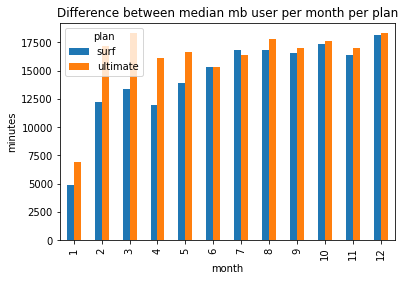

In [94]:
# Comparamos la cantidad de megabytes promedio por cada plan por cada mes

complete_df.pivot_table(values="mb_month", index="month", columns="plan", aggfunc="mean").plot(kind="bar")

plt.title('Difference between median mb user per month per plan')
plt.ylabel('minutes')
plt.show()

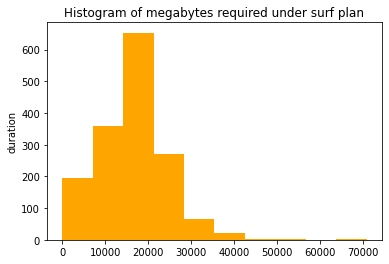

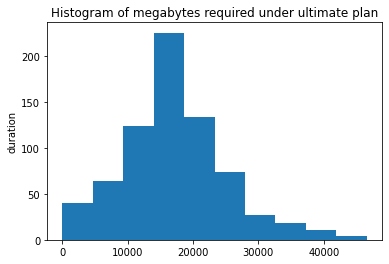

In [71]:
# Comparamos la cantidad de megabytes que los usuarios de cada plan requieren cada mes

for name, df in complete_df.groupby('plan')['mb_month']:
    if name == "surf":
        plt.hist(df,color='orange')
    else:
        plt.hist(df)
    plt.title(f'Histogram of megabytes required under {name} plan')
    plt.ylabel('duration')
    plt.show()

In [72]:
# Calculamos la media y la varianza de la cantidad mensual de megabytes

complete_df.groupby('plan')['mb_month'].agg(['median',np.var])

,median,var
plan,,
surf,16829.31,6.421640e+07
ultimate,16858.34,6.165229e+07


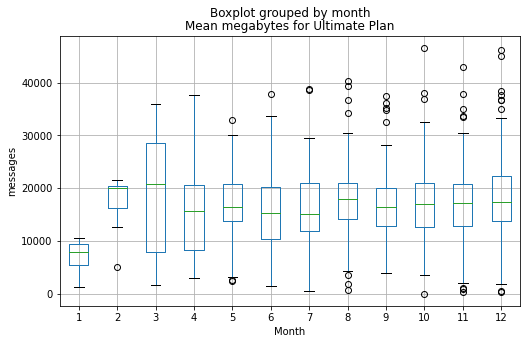

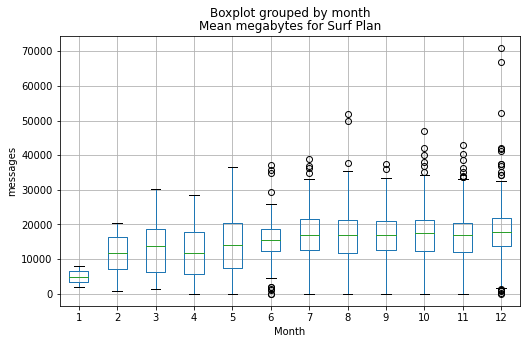

In [95]:
#Trazamos un diagrama de caja para visualizar la distribución de la cantidad de megabytes por plan por mes

for plan in complete_df['plan'].unique():
    
    data = complete_df[complete_df['plan'] == plan]
    
    if plan == 'surf':
        data.boxplot(column='mb_month',by='month',figsize=(8,5))
    
    else:
        data.boxplot(column='mb_month',by='month',figsize=(8,5))

    plt.title(f"Mean megabytes for {plan.capitalize()} Plan")
    plt.xlabel('Month')
    plt.ylabel('messages')
    plt.show()

**Conclusiones**

Al analizar nuestros gráficos de megabytes usados al mes por cada usuario en los diferentes planes observamos algunas diferencias.

Al analizar nuestro grafico de barras de comparación del promedio de megabytes consumidos al mes por los usuarios de cada plan, vemos que, a pesar de parecer similares, tenemos más meses en los que la cantidad promedio de megabytes consumidos por los usuarios del plan ‘ultimate’ fueron superior a lo consumido por los usuarios de ‘surf’; especialmente entre los meses de febrero a mayo. 

En nuestra comparación de histogramas vemos que la distribución de los usuarios del plan ‘ultimate’ es más normal que la distribución de los usuarios del plan ‘surf’. Podemos ver que ambas distribuciones tienen el pico más alto entre los 17000 y 20000 megabytes. Y también podemos ver que hay usuarios del plan ‘surf’ que pueden llegar a utilizar más de 70000 megabytes y que los usuarios del plan ‘ultimate’ solo llegan a superar un poco los 40000 megabytes. 

Al ver nuestras medianas, podemos ver que son bastante similares. La mediana para el plan ‘surf’ es de 16829.31 y la mediana para el plan ‘ultimate’ es de 16858.34. Solo una diferencia de 29.03 megabytes. 

En nuestra comparación de diagramas de caja podemos ver también las diferencias mencionadas anteriormente. Vemos que los usuarios del plan ‘surf’ pueden llegar a utilizar más de 70000 megabytes mientras que los usuarios del plan ‘ultimate’ solo pasan un poco los 40000 megabytes. 

## Ingreso

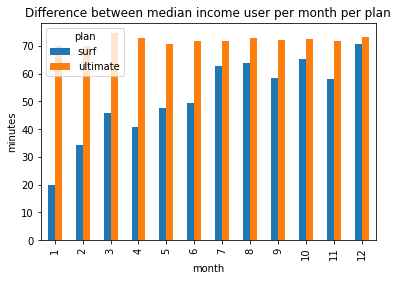

In [96]:
# Comparamos la cantidad promedio de ingreso por cada plan por cada mes

complete_df.pivot_table(values="monthly_income", index="month", columns="plan", aggfunc="mean").plot(kind="bar")

plt.title('Difference between median income user per month per plan')
plt.ylabel('minutes')
plt.show()

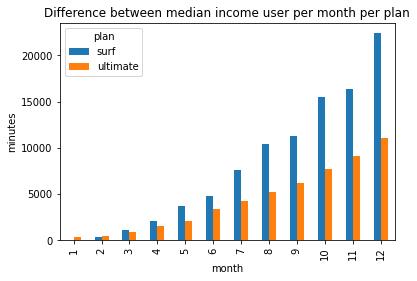

In [97]:
#Calculamos la diferencia de ingresos totales 

complete_df.pivot_table(values="monthly_income", index="month", columns="plan", aggfunc="sum").plot(kind="bar")

plt.title('Difference between total income user per month per plan')
plt.ylabel('minutes')
plt.show()

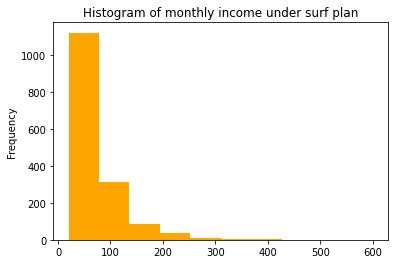

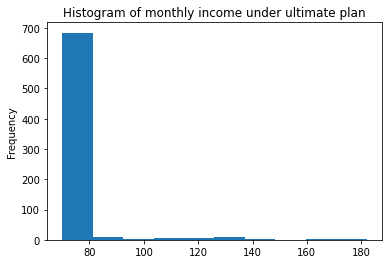

In [76]:
# Comparamos la distribucion de ingresos por plan por mes

for name, df in complete_df.groupby('plan')['monthly_income']:
    if name == "surf":
        plt.hist(df,color='orange')
    else:
        plt.hist(df)
    plt.title(f'Histogram of monthly income under {name} plan')
    plt.ylabel('Frequency')
    plt.show()

In [77]:
# Calculamos la media y la varianza de los ingresos mensuales por plan

complete_df.groupby('plan')['monthly_income'].agg(['median',np.var])

,median,var
plan,,
surf,40.51,3198.677644
ultimate,70.00,137.638338


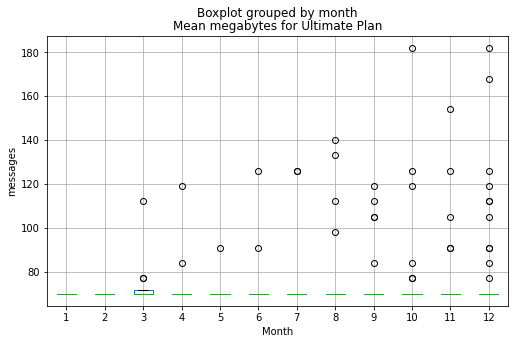

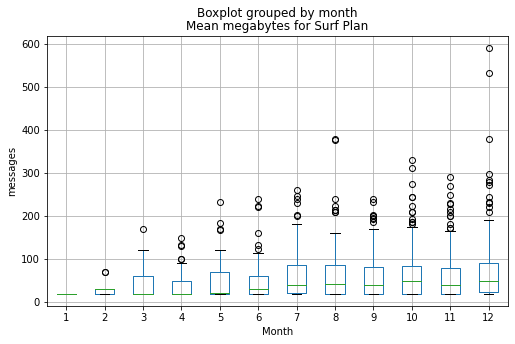

In [98]:
#Trazamos un diagrama de caja para visualizar la distribución de ingresos mensuales por plan por mes

for plan in complete_df['plan'].unique():
    
    data = complete_df[complete_df['plan'] == plan]
    
    if plan == 'surf':
        data.boxplot(column='monthly_income',by='month',figsize=(8,5))
    
    else:
        data.boxplot(column='monthly_income',by='month',figsize=(8,5))

    plt.title(f"Mean megabytes for {plan.capitalize()} Plan")
    plt.xlabel('Month')
    plt.ylabel('messages')
    plt.show()

 **Conclusiones**
 
Al analizar nuestros gráficos de ingresos mensuales por usuario de cada plan podemos observar algunas diferencias. 

Nuestro primer grafico de barras de la diferencia de medias de ingresos mensuales al mes podemos ver que en promedio los usuarios del plan ‘ultimate’ generan más ingresos. Podemos observar como en cada mes el promedio de ‘ultimate’ está por encima de los 70 dólares. Sin embargo, en nuestros análisis anteriores hemos visto que los usuarios del plan ‘surf’ suelen consumir más minutos, mensajes, y megabytes adicionales. Por esta razón realice otro gráfico con los ingresos totales por cada plan y podemos ver claramente que los usuarios del plan ‘surf’ generaron más ingresos por mes. Esto se debería a que pagan valores adicionales a los de su plan ya que consumen más de lo que está estipulado en su contrato. No obstante, esta diferencia de ingresos totales también puede deberse a que tenemos más usuarios dentro del plan ‘surf’ que del plan ‘ultimate’.

Al ver nuestros histogramas podemos observar lo que mencionaba anteriormente. Nuestro histograma del plan ‘surf’ nos deja observar que tenemos más cantidad de personas pagando valores elevados de entre 100 y 200 dólares mensuales que los usuarios del plan ‘ultimate’. Sabemos que el plan ‘surf’ tiene tan solo un precio de 20 dolares y aun asi tenemos muchas personas pagando alrededor de los 100 dolares que en nuestro pan ‘ultimate’. Nuestro histograma de ‘ultimate’ muestra que la gran mayoría de usuarios se mantiene pagando entre los 80 dólares. Lo cual está bien ya que el precio normal de este plan es de 70. En el plan ‘ultimate’ también tenemos que pagan valores más elevados per no tantos como en el plan ‘surf’. Al parecer los usuarios del plan ‘ultimate’ se mantiene más entre sus límites que los del plan ‘surf’.

Tambien vemos que las medianas y variazas de cada plan son bastante diferentes. La mediana de ‘surf’ es de 40.51 mientras que la mediana de ‘ultimate’ es 70.00. La varianza de ‘surf’ también es bastante más elevada que la varianza de ‘ultimate’. 

Nuestros diagramas de caja también nos permiten observar algunas de las conclusiones ya mencionadas. Al observar el diagrama de caja de ‘surf’ vemos que tenemos la mayoría de nuestros valores entre 20 y casi 100 y que tenemos varias personas pagando también entre 200 hasta 600 dólares. Y en nuestro diagrama de caja de ‘ultimate’ vemos que la mayoría de nuestros datos están en menos de 80 dólares. Lo cual es normal. Vemos también que si hay personas que llegan a pagar entre 80 a 180 dólares per son menos que las de ‘surf’.


## Probar las hipótesis estadísticas.

Ahora vamos a comprobar nuestras hipótesis estadísticamente. 

### Primera Hipótesis 

$H_O$ = Los promedios de ingreso mensual de cada plan son iguales

$H_a$ = Los promedios de ingreso mensual de cada plan son diferentes

&#945;= 0.05

Prueba estadística = Hipótesis sobre la igualdad de las medias de dos poblaciones

In [79]:
# Levene's test para saber si las variazas son iguales o no
levene(complete_df.query("plan == 'surf'")['monthly_income'],
       complete_df.query("plan == 'ultimate'")['monthly_income'])

LeveneResult(statistic=400.8248262261711, pvalue=2.657585178960269e-82)

Con un nivel de significancia de 0.05 podemos decir que las varianzas no son iguales ya que nuestro p-value es menor. 

In [80]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(complete_df.query("plan == 'surf'")['monthly_income'],
                       complete_df.query("plan == 'ultimate'")['monthly_income'],
                       equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 3.1400222564288427e-13
Rechazamos la hipótesis nula


**Conclusiones**

Al tener un p-value menor que nuestro nivel de significancia podemos rechazar la hipótesis nula y decir que tenemos suficiente información para decir que los promedios de ingresos mensuales de cada plan son diferentes. 

### Segunda Hipótesis 

$H_O$ = Los promedios de ingreso de los usuarios del area NY-NJ y los usuarios de las demas areas son iguales

$H_a$ = Los promedios de ingreso de los usuarios del area NY-NJ y los usuarios de las demas areas son diferentes

&#945;= 0.05

Prueba estadística = Hipótesis sobre la igualdad de las medias de dos poblaciones

In [81]:
# Levene's test para saber si las variazas son iguales o no

levene(complete_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_income'],
       complete_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_income'])

LeveneResult(statistic=2.4133911578435394, pvalue=0.12043962996256541)

Con un nivel de significancia de 0.05 diríamos que las varianzas de ambas poblaciones son similares. 

In [82]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(
    complete_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_income'],
    complete_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_income'],
                       equal_var = True
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
   print("Rechazamos la hipótesis nula")
else:
   print("No rechazamos la hipótesis nula")

p-value: 0.05127808702667875
No rechazamos la hipótesis nula


**Conclusiones**

Al tener un p-value mayor que nuestro nivel de significancia podemos decir que no tenemos suficiente información para rechazar la hipótesis nula. Y podemos decir que los promedios de ingresos mensuales los usuarios del área NY-NJ y la del resto de áreas son iguales. 

## Conclusión general

**Preparar los datos**

En el dataset de planes no realizamos ningún cambio. Este contenía la información de cada plan con sus minutos, megas, y mensajes. Y el costo de megas, minutos, y mensajes adicionales. 

En el dataset de usuarios encontramos valores nulos que decidimos no cambiar ya que estos indicaban que estos usuarios no habían cancelado sus planes. No encontramos valores atipicos ni duplicados. Cambiamos el Dtybe de las columnas con fecha a datetime. Y creamos una nueva columna con solo el mes y el año.

En el dataset de llamadas encontramos valores atípicos en la columna `duration`. Sin embargo, decidimos no hacer ningún cambio ya que estos valores nos ayudarían más adelante en nuestro análisis. No encontramos valores nulos ni duplicados. Creamos una columna con el ano y mes de cada llamada. Creamos una columna de minutos por llamada redondeando hacia arriba. Creamos una columna con la cantidad de llamadas hechas al mes por cada usuario. Creamos una columna con la suma de minutos por mes de cada usuario.

En el dataset de mensajes no encontramos valores atípicos ni nulos ni duplicados. Cambiamos el Dtype de la columna de fecha a datetime. Creamos una columna con el mes y año de cada mensaje y creamos una columna con la suma de todos los mensajes enviados al mes por cada persona.

En el dataset de internet econtramos valores atípicos en la columna `mb_used` pero al igual que en nuestro dataset de llamadas decidimos no hacer cambios ya que estos datos nos ayudarían más adelante en nuestro análisis. No encontramos valores nulos ni duplicados. Cambiamos el Dtype de la columna de fecha a datetime. Creamos una columna de mes y año como en los otros datasets, creamos una columna con la suma de megabytes usados al mes por cliente, y creamos una columna de los gigabytes usados al mes por cliente.

**Agregar datos por usuario**

Creamos una dataset con la información de usuario, mes-año, y la cantidad de llamadas hechas al mes por cada usuario. 

Creamos un dataset con la cantidad de minutos que usó cada usuario por mes.

Creamos un dataset con el número de mensajes enviados por cada usuario por mes.

Creamos un dataset con el volumen del tráfico de internet usado por cada usuario por mes.

Combinamos todos estos datasets con el dataset de usuarios y planes para tener un dataset final para usar en nuestro análisis. 

Arreglamos los valores nulos de nuestro dataset final.

Creamos una nueva columna con los ingresos mensuales por usuario. 

**Estudia el comportamiento del usuario**

**Llamadas**

Los usuarios de ambos planes tienen comportamientos similares. La duacion media de llamada del plan ‘surf’ es de 428.75 y la media para el plan ‘ultimate’ es de 430.45.
El plan ‘surf’ tiene valores mas elevados de hasta 1400 minutos. 
El plan ‘surf’ tiene mas cantidad de usuarios utilizando minutos arriba de 1000 que ‘ultimate’. 

**Mensajes**

La media de mensajes de los usuarios de ‘surf’ es de 31 y la media de los usuarios de ‘ultimate’ es de 37. 
Ambas distribuciones están sesgadas hacia la derecha.
Lo usuarios de ‘surf’ pueden llegar a usar hasta 250 mensajes mientras que los usuarios de ‘ultimate’ llegan a usar hasta 150. 
La mediana de ‘surf’ es de 24 y la mediana de ‘ultimate’ es de 30.

**Internet**

Los usuarios del plan ‘surf’ en promedio consumen unos 16558.28 megabytes y los usuarios del plan ‘ultimate’ consumen unos 17214.70. Los usuarios del plan ‘ultimate’ consumen en promedio 656.42 megabytes más.
Los usuarios del plan ‘surf’ que pueden llegar a utilizar más de 70000 megabytes y que los usuarios del plan ‘ultimate’ solo llegan a superar un poco los 40000 megabytes.
La mediana para el plan ‘surf’ es de 16829.31 y la mediana para el plan ‘ultimate’ es de 16858.34. Solo una diferencia de 29.03 megabytes.

**Ingreso**

Los usuarios del plan ‘ultimate’ en promedio generan 72 dólares al mes mientras que los usuarios del plan ‘surf’ solo llegan a generar en promedio 62 dólares al mes.
Los usuarios del plan ‘surf’ generaron más ingresos al finalizar el año 2018. 
Tenemos más cantidad de personas pagando valores elevados de entre 100 y 200 dólares mensuales que los usuarios del plan ‘ultimate.
Los usuarios del plan ‘ultimate’ se mantiene más entre sus límites que los del plan ‘surf’.
La mediana de ‘surf’ es de 40.51 mientras que la mediana de ‘ultimate’ es 70.00.
En el plan ‘surf’ tenemos varias personas pagando también entre 200 hasta 600 dólares.
En el plan ‘ultimate’ la mayoría de nuestros datos están en menos de 80 dólares.
En el plan ‘surf’ hay personas que llegan a pagar entre 80 a 180 dólares per son menos que las de ‘surf’.

**Probar las hipótesis estadísticas**

**Los promedios de ingreso de los usuarios del area NY-NJ y los usuarios de las demas areas son iguales**

Al tener un p-value menor que nuestro nivel de significancia podemos rechazar la hipótesis nula y decir que tenemos suficiente información para decir que los promedios de ingresos mensuales de cada plan son diferentes.

**Los promedios de ingreso de los usuarios del area NY-NJ y los usuarios de las demas areas son iguales**

Al tener un p-value menor que nuestro nivel de significancia podemos rechazar la hipótesis nula y decir que tenemos suficiente información para decir que los promedios de ingresos mensuales de cada plan son diferentes.